In [2]:
# Import packages
from pathlib import Path
import numpy as np
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
import pandas as pd
from pdb import set_trace
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [3]:
# File path
label_path = '/home/ec2-user/Jul2025/labels/'
dataset_path = '/home/ec2-user/Jul2025/processed_dataset3/'
figure_output_path = '/home/ec2-user/Jul2025/Manuscript figures/UMAP'

# UMAP exploration

In [83]:
def plot_umap(df, label_df, label_col, n_neighbors=15, min_dist=0.1, metric='correlation',
              figsize=(6, 6), point_size=25,
              save_path=None, dpi=300):
    """
    Parameters:
    - df: pandas DataFrame, features only (shape: n_samples x n_features)
    - label_df: pandas DataFrame, must align with df index and contain label_col
    - label_col: str, column name in label_df to use for coloring
    - n_neighbors: int, UMAP n_neighbors parameter
    - min_dist: float, UMAP min_dist parameter
    - metric: str, UMAP metric
    - figsize: tuple, figure size
    - point_size: int, size of points
    - palette: seaborn palette
    - title: str, optional title
    - save_path: str, path to save image
    - dpi: int, image resolution

    Returns:
    - None
    """
    compartment_colors = {
    'Cytosol': '#fc8d62',      # Your choice
    'Mitochondria': '#e78ac3', # Your choice
    'Nucleus': '#8da0cb',      # Your choice
    'Secretory': '#66c2a5'     # Your choice
    }

    # Make label_df have the same index as df
    label_df = label_df.loc[df.index]

    # Check if label_df has the same length as df
    if len(label_df) != len(df):
        raise ValueError("label_df must have the same number of rows as df")
    
    labels = label_df[label_col]

    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=42)
    embedding = reducer.fit_transform(df)

    # Combine embedding and labels
    umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=df.index)
    umap_df[label_col] = labels

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.scatterplot(
        data=umap_df,
        x="UMAP1",
        y="UMAP2",
        hue=label_col,
        palette=compartment_colors,
        s=point_size,
        linewidth=0,
        alpha=0.85)

    # Axis labels
    ax.set_xlabel("UMAP Component 1", fontsize=10)
    ax.set_ylabel("UMAP Component 2", fontsize=10)

    # Remove top and right spines
    sns.despine(ax=ax, top=True, right=True)

    # Spine width
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    # Legend
    plt.legend(title=label_col, loc='best', frameon=False, fontsize=10)

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=dpi)
    plt.show()


In [7]:
# Read in datasets from processed_dataset3
# Krug breast 
krug_breast_PD = pd.read_csv(Path(dataset_path + 'K_PD_synthetic_kde_june.csv'), index_col=0)
krug_breast_MD = pd.read_csv(Path(dataset_path + 'K_MD_synthetic_kde_june.csv'), index_col=0)

# Mertins breast 
mertins_breast_PD = pd.read_csv(Path(dataset_path + 'M_PD_synthetic_kde_june.csv'), index_col=0)
mertins_breast_MD = pd.read_csv(Path(dataset_path + 'M_MD_synthetic_kde_june.csv'), index_col=0)

# Lung tumor
lung_tumor_PD = pd.read_csv(Path(dataset_path + 'lung_tumor_PD_synthetic_kde_june.csv'), index_col=0)
lung_tumor_MD = pd.read_csv(Path(dataset_path + 'lung_tumor_MD_synthetic_kde_june.csv'), index_col=0)

# Lung NAT
lung_nat_PD = pd.read_csv(Path(dataset_path + 'lung_nat_PD_synthetic_kde_june.csv'), index_col=0)
lung_nat_MD = pd.read_csv(Path(dataset_path + 'lung_nat_MD_synthetic_kde_june.csv'), index_col=0)

# Glioma tumor
glioma_tumor_PD = pd.read_csv(Path(dataset_path + 'glioma_tumor_PD_synthetic_kde_june.csv'), index_col=0)
glioma_tumor_MD = pd.read_csv(Path(dataset_path + 'glioma_tumor_MD_synthetic_kde_june.csv'), index_col=0)

# Assemble all these dfs into a dict
datasets = {
    'Krug_Breast_PD': krug_breast_PD,
    'Krug_Breast_MD': krug_breast_MD,
    'Mertins_Breast_PD': mertins_breast_PD,
    'Mertins_Breast_MD': mertins_breast_MD,
    'Lung_Tumor_PD': lung_tumor_PD,
    'Lung_Tumor_MD': lung_tumor_MD,
    'Lung_NAT_PD': lung_nat_PD,
    'Lung_NAT_MD': lung_nat_MD,
    'Glioma_Tumor_PD': glioma_tumor_PD,
    'Glioma_Tumor_MD': glioma_tumor_MD
}

In [9]:
# Read in labels
compartment_labels = pd.read_csv(Path(label_path + 'markers.txt'), sep='\t', index_col=0)

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


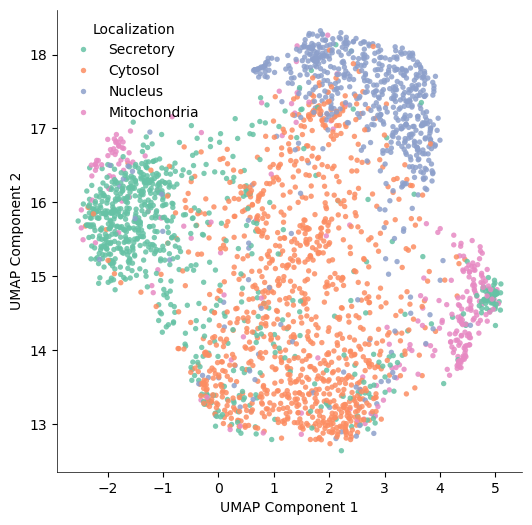

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


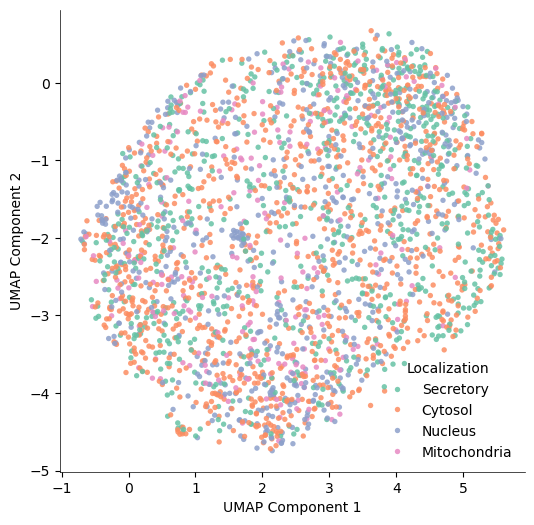

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


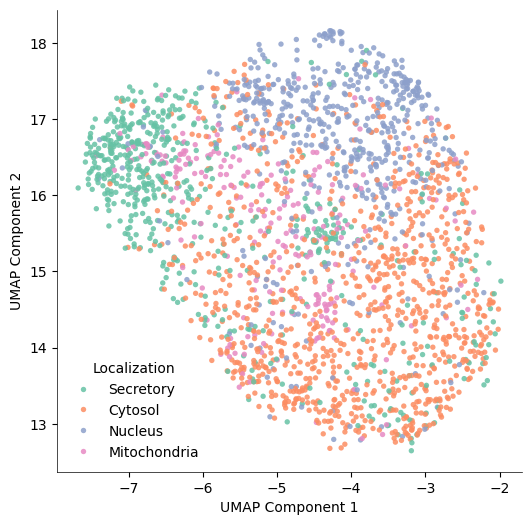

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


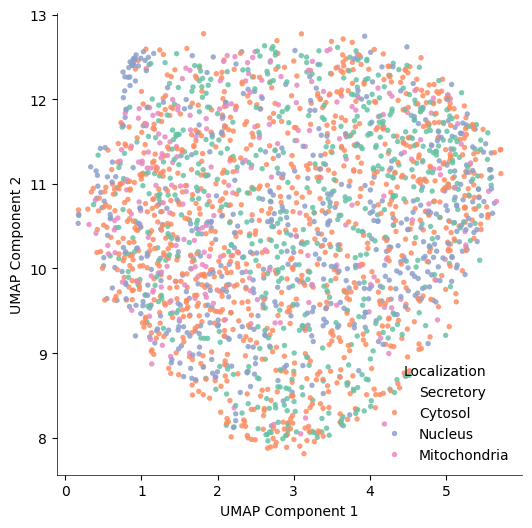

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


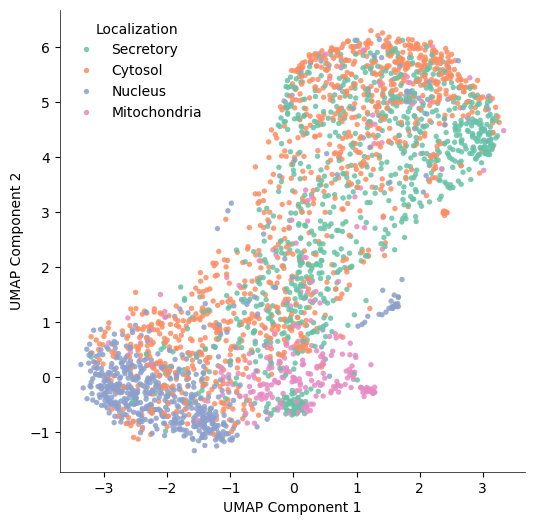

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


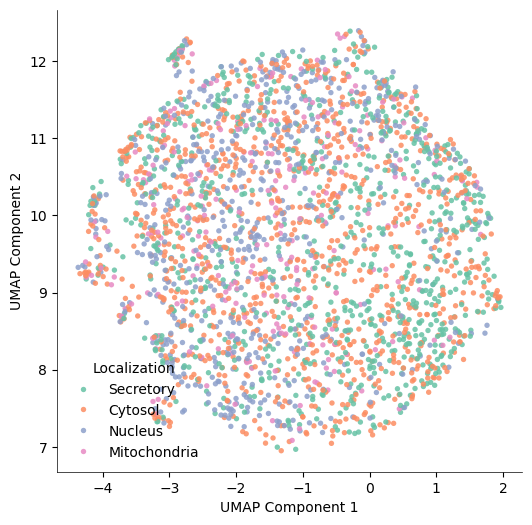

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


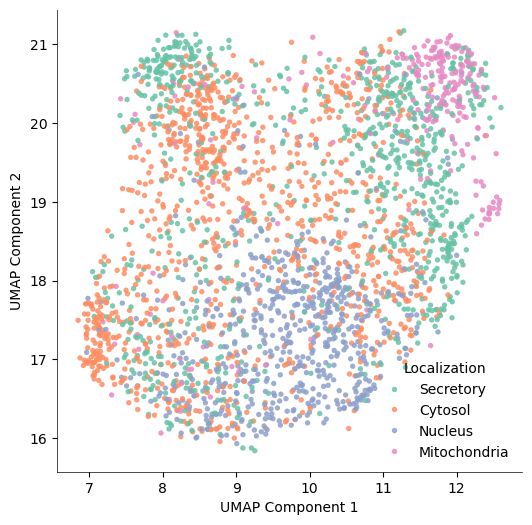

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


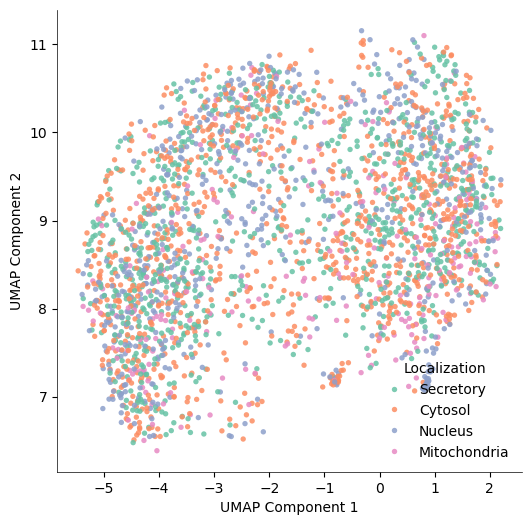

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


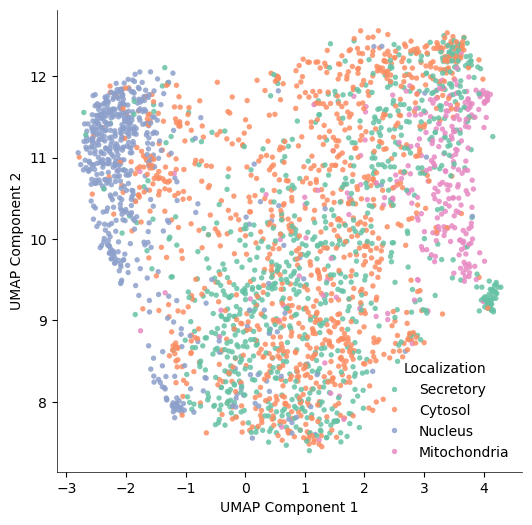

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


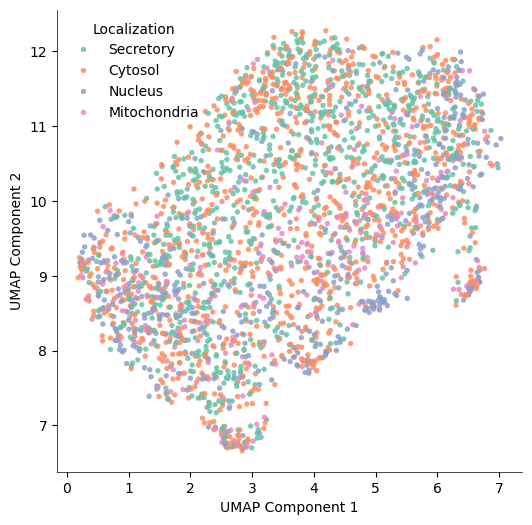

In [86]:
for name, df in datasets.items():
    plot_umap(df, compartment_labels, 'Localization',
              n_neighbors=100, min_dist=0.1, metric='correlation',
              figsize=(6, 6), point_size=15, save_path=Path(figure_output_path+f'/{name}_umap.pdf'),
              dpi=300)

# Annotation of prediction

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

def plot_umap(df, label_df, label_col, prediction_status=None, 
              n_neighbors=15, min_dist=0.1, metric='correlation',
              figsize=(8, 6), point_size=25,
              save_path=None, dpi=300):
    """
    Parameters:
    - df: pandas DataFrame, features only (shape: n_samples x n_features)
    - label_df: pandas DataFrame, must align with df index and contain label_col
    - label_col: str, column name in label_df to use for coloring
    - prediction_status: dict, keys=gene names (index in df), values='correct'/'incorrect'
    - n_neighbors, min_dist, metric, figsize, point_size, palette, save_path, dpi: same as before

    Returns:
    - None
    """

    compartment_colors = {
    'Cytosol': '#fc8d62',      # Your choice
    'Mitochondria': '#e78ac3', # Your choice
    'Nucleus': '#8da0cb',      # Your choice
    'Secretory': '#66c2a5'     # Your choice
    }

    # Align label_df to df index
    label_df = label_df.loc[df.index]
    if len(label_df) != len(df):
        raise ValueError("label_df must have the same number of rows as df")

    labels = label_df[label_col]

    # Generate UMAP embedding
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=42)
    embedding = reducer.fit_transform(df)

    # Prepare DataFrame for plotting
    umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=df.index)
    umap_df[label_col] = labels

    # Add prediction status if provided
    if prediction_status:
       # Map status, default to None if missing
       umap_df['status'] = umap_df.index.map(prediction_status).fillna('no_status')
    else:
       umap_df['status'] = 'no_status'

    # Define marker styles for statuses
    marker_dict = {
        'correct': 'o',
        'incorrect': 'X',
    #    'no_status': 'o',  # Will be transparent anyway
    }

    # Define alpha per status
    alpha_dict = {
        'correct': 0.95,
        'incorrect': 0.25,
    #    'no_status': 0.0,
    }

    plt.figure(figsize=figsize)
    ax = plt.gca()

    # Plot each status separately for control over alpha and marker
    for status in ['correct', 'incorrect']:
        subset = umap_df[umap_df['status'] == status]
        if subset.empty:
            continue

        sns.scatterplot(
            data=subset,
            x='UMAP1',
            y='UMAP2',
            hue=label_col if status != 'no_status' else None,
            palette=compartment_colors if status != 'no_status' else None,
            s=point_size,
            marker=marker_dict[status],
            alpha=alpha_dict[status],
            linewidth=0,
            ax=ax,
            legend='brief' if status != 'no_status' else False
        )

    # Axis labels and styling
    ax.set_xlabel("UMAP Component 1", fontsize=10)
    ax.set_ylabel("UMAP Component 2", fontsize=10)
    sns.despine(ax=ax, top=True, right=True)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    # Adjust legend: combine hue legend and status markers
    handles, labels_ = ax.get_legend_handles_labels()
    # Remove duplicate legend entries for label_col if any
    # This may require extra tweaks depending on seaborn/matplotlib version

    # Add custom legend for prediction status markers
    import matplotlib.lines as mlines
    legend_elements = [
        mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Correct'),
        mlines.Line2D([], [], color='black', marker='X', linestyle='None', markersize=5, label='Incorrect'),
    ]

    # Show legend
    ax.legend(handles=handles + legend_elements, title=label_col, loc='best', frameon=False, fontsize=10)

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=dpi)
    plt.show()


In [6]:
# 
correct_M_indices = pd.read_csv('Enrichr_prot/Protein_Mertins_Breast_correct_indices.txt', header=None)
incorrect_M_indices = pd.read_csv('Enrichr_prot/Protein_Mertins_Breast_incorrect_indices.txt', header=None)

# turn these into one dict but with keys as the index and correct/incorrect as values
combine_M_dict_prot = {}
for idx in correct_M_indices[0]:
    combine_M_dict_prot[idx] = 'correct'
for idx in incorrect_M_indices[0]:
    combine_M_dict_prot[idx] = 'incorrect'

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


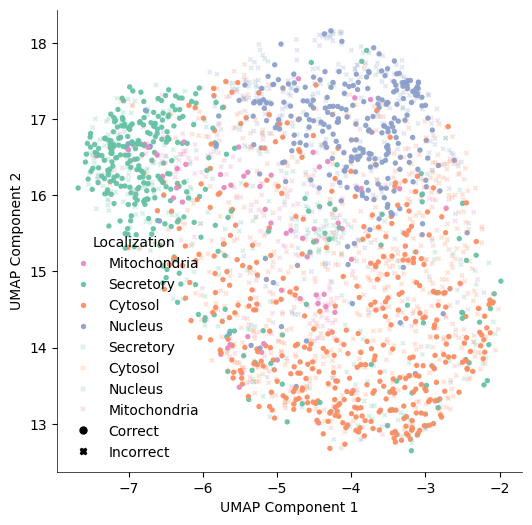

In [10]:
# Read in the datasets
plot_umap(mertins_breast_PD, compartment_labels, 'Localization', prediction_status=combine_M_dict_prot,
          n_neighbors=100, min_dist=0.1, metric='correlation',
          figsize=(6, 6), point_size=15, save_path=Path(figure_output_path+'/Mertins_Breast_Tumor_PD_umap_annotated_prediction.pdf'),
          dpi=300)

In [89]:
# 
correct_lung_indices = pd.read_csv('Enrichr_prot/Protein_Lung_Tumor_correct_indices.txt', header=None)
incorrect_lung_indices = pd.read_csv('Enrichr_prot/Protein_Lung_Tumor_incorrect_indices.txt', header=None)

# turn these into one dict but with keys as the index and correct/incorrect as values
combine_lung_dict_prot = {}
for idx in correct_lung_indices[0]:
    combine_lung_dict_prot[idx] = 'correct'
for idx in incorrect_lung_indices[0]:
    combine_lung_dict_prot[idx] = 'incorrect'

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


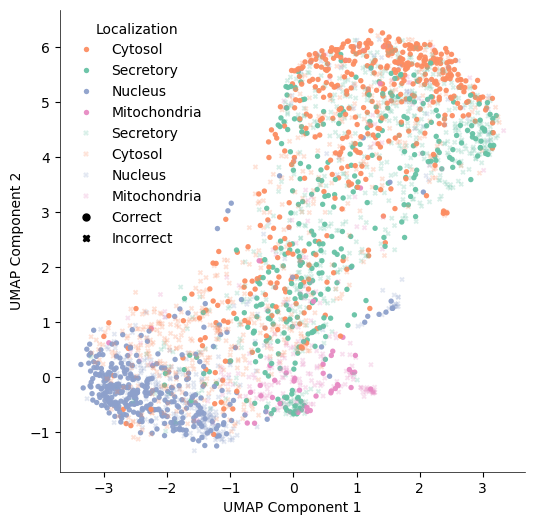

In [90]:
# Read in the datasets
plot_umap(lung_tumor_PD, compartment_labels, 'Localization', prediction_status=combine_lung_dict_prot,
          n_neighbors=100, min_dist=0.1, metric='correlation',
          figsize=(6, 6), point_size=15, save_path=Path(figure_output_path+'/Lung_Tumor_PD_umap_annotated_prediction.pdf'),
          dpi=300)

In [91]:
# 
correct_glioma_indices = pd.read_csv('Enrichr_prot/Protein_Glioma_correct_indices.txt', header=None)
incorrect_glioma_indices = pd.read_csv('Enrichr_prot/Protein_Glioma_incorrect_indices.txt', header=None)

# turn these into one dict but with keys as the index and correct/incorrect as values
combine_glioma_dict_prot = {}
for idx in correct_glioma_indices[0]:
    combine_glioma_dict_prot[idx] = 'correct'
for idx in incorrect_glioma_indices[0]:
    combine_glioma_dict_prot[idx] = 'incorrect'

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


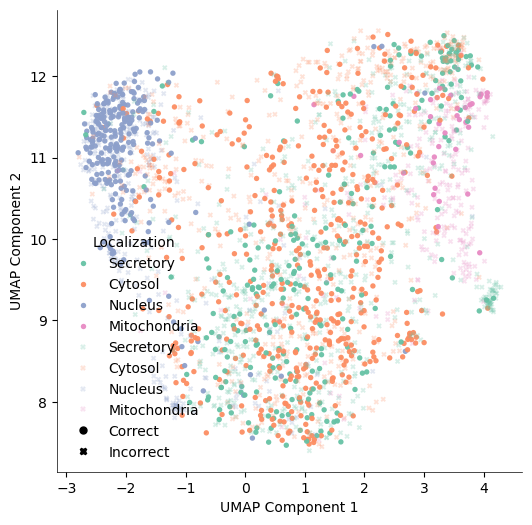

In [92]:
# Read in the datasets
plot_umap(glioma_tumor_PD, compartment_labels, 'Localization', prediction_status=combine_glioma_dict_prot,
          n_neighbors=100, min_dist=0.1, metric='correlation',
          figsize=(6, 6), point_size=15, save_path=Path(figure_output_path+'/Glioma_Tumor_PD_umap_annotated_prediction.pdf'),
          dpi=300)

In [93]:
# 
correct_lung_indices = pd.read_csv('Enrichr_mito/Protein_Lung_Tumor_correct_indices.txt', header=None)
incorrect_lung_indices = pd.read_csv('Enrichr_mito/Protein_Lung_Tumor_incorrect_indices.txt', header=None)

# turn these into one dict but with keys as the index and correct/incorrect as values
combine_lung_dict_prot = {}
for idx in correct_lung_indices[0]:
    combine_lung_dict_prot[idx] = 'correct'
for idx in incorrect_lung_indices[0]:
    combine_lung_dict_prot[idx] = 'incorrect'

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


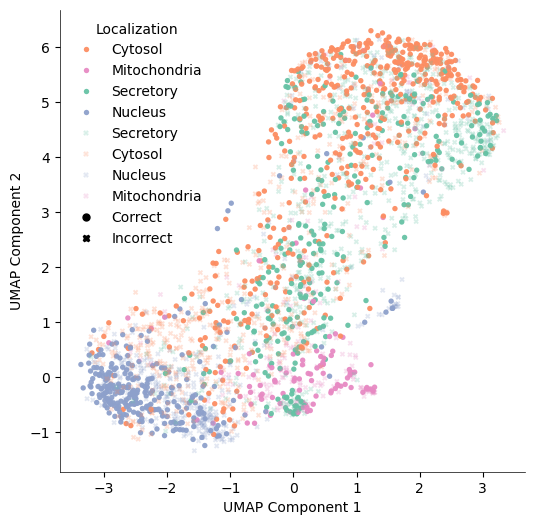

In [94]:
# Read in the datasets
plot_umap(lung_tumor_PD, compartment_labels, 'Localization', prediction_status=combine_lung_dict_prot,
          n_neighbors=100, min_dist=0.1, metric='correlation',
          figsize=(6, 6), point_size=15, save_path=Path(figure_output_path+'/Mito_Lung_Tumor_PD_umap_annotated_prediction.pdf'),
          dpi=300)

In [95]:
# 
correct_glioma_indices = pd.read_csv('Enrichr_mito/Protein_Glioma_correct_indices.txt', header=None)
incorrect_glioma_indices = pd.read_csv('Enrichr_mito/Protein_Glioma_incorrect_indices.txt', header=None)

# turn these into one dict but with keys as the index and correct/incorrect as values
combine_glioma_dict_prot = {}
for idx in correct_glioma_indices[0]:
    combine_glioma_dict_prot[idx] = 'correct'
for idx in incorrect_glioma_indices[0]:
    combine_glioma_dict_prot[idx] = 'incorrect'

/opt/conda/envs/pytorch/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


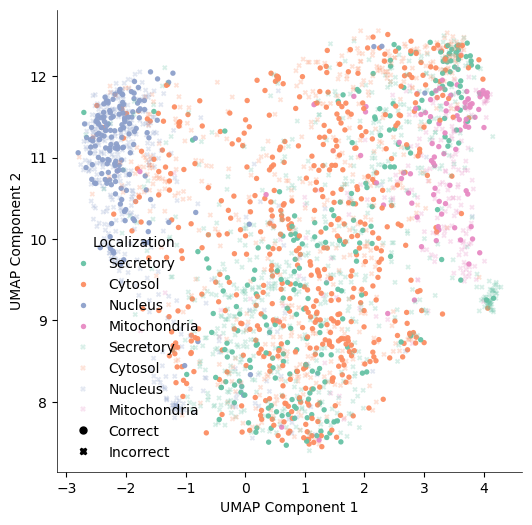

In [97]:
# Read in the datasets
plot_umap(glioma_tumor_PD, compartment_labels, 'Localization', prediction_status=combine_glioma_dict_prot,
          n_neighbors=100, min_dist=0.1, metric='correlation',
          figsize=(6, 6), point_size=15, save_path=Path(figure_output_path+'/Mito_Glioma_Tumor_PD_umap_annotated_prediction.pdf'),
          dpi=300)